# 1. Import and Setup
- In order to display Chinese characters, use font manager to set font family.
- Axix label size and text size are in fact independent of each other, and must be set separately.

In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import font_manager

font_size = 16
plot_size = 10  # Inches

# So that it can display Chinese
fontP = font_manager.FontProperties()
fontP.set_family('Heiti TC')
fontP.set_size(font_size)  # Text size

# Style
plt.style.use('ggplot')  # Lightgrey background
plt.rcParams.update({'font.size': font_size})  # Axis label size

# 2. Utils
- The "label_bars" function is used to put text on the top of each bars (actually it's a pie in polar chart in our case).

In [2]:
def label_bars(bars, labels, prop):
    """
    Attach a text label above each bar displaying its height
    """
    for bar, label in zip(bars, labels):
        x = bar.get_x() + bar.get_width()/2.
        y = 1.05 * bar.get_height()
        # ax.annotate(label, (x, y))
        ax.text(x, y, label, ha='center', va='bottom', fontproperties=prop)

def num2time(num):
    hour = np.floor(num).astype(np.uint8)
    min = int((num - hour) * 60)
    return f'{hour}:{min:02}'
                

# 3. Input Arguments
- Meaning of different types:
    - 3: No activity
    - 4: Casual activities (Not tiring)
    - 5: Serious activities (Might be tiring)
    - 6: Work that makes money

In [3]:
file_name = 'chronodex.png'
color_mapping = {3: 'darkorange', 4: 'gold', 5: 'lawngreen', 6: 'lightseagreen'}
tasks = {  # key: start time / value: task name and type
    0.0: {'name': '睡覺', 'type': 3},
    7.5: {'name': '運動', 'type': 5},
    8.5: {'name': '工作', 'type': 6},
    12.5: {'name': '午餐', 'type': 4},
    13.5: {'name': '工作', 'type': 6},
    17.5: {'name': '休息', 'type': 4},
    18.0: {'name': '學習\n運動\n私事', 'type': 5},
    19.5: {'name': '晚餐', 'type': 4},
    21.0: {'name': '學習\n運動\n私事', 'type': 5},
    22.0: {'name': '放鬆', 'type': 4},
    23.0: {'name': '洗澡', 'type': 4},
}

# 4. Data Processing

In [4]:
n_tasks = len(tasks)
start_times = []
labels = []
types = []
for time, task in tasks.items():
    start_times.append(time)
    labels.append(task['name'])
    types.append(task['type'])
types = np.asarray(types)
start_times = np.asarray(start_times)

thetas = []
widths = []
for idx in range(n_tasks):
    start_time = start_times[idx]
    if idx != (n_tasks - 1):
        end_time = start_times[idx - n_tasks + 1]
    else:
        end_time = 24.0
    thetas.append((start_time + end_time) / 2)
    widths.append(end_time - start_time)
thetas = np.asarray(thetas) * (np.pi / 12)
widths = np.asarray(widths) * (np.pi / 12)

colors = [color_mapping[type] for type in types]

# 5. Plot

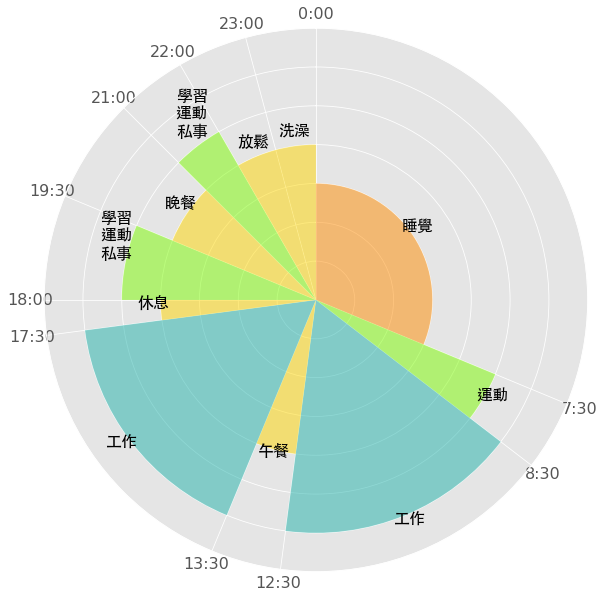

In [5]:
ax = plt.subplot(projection='polar')
fig = plt.gcf()
fig.set_size_inches(plot_size, plot_size)

ax.set_theta_zero_location('N', offset=0.0)
ax.set_theta_direction('clockwise')
ax.set_thetagrids(start_times / 24 * 360, map(num2time, start_times))  # In degrees
ax.set_yticklabels([])
ax.set_ylim([0,7])

# Don't use tick_label as it overwrites thetagrids in axis settings
bars = ax.bar(thetas, types, width=widths, bottom=0.0, color=colors, alpha=0.5)

label_bars(bars, labels, fontP)
fig.savefig(file_name)
# fig